In [44]:
# Dependencies

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# path to clean file with data
clean_file = 'Resources/HomeValue_clean.csv'

#read file to DataFrame
homes_value_orig_df = pd.read_csv(clean_file)

In [6]:
homes_value_orig_df.head()

,County,State,Home Type,Avg house price
0,Los Angeles,CA,4 bedroom,722251.25
1,San Diego,CA,4 bedroom,698838.33
2,Orange,CA,4 bedroom,860278.42
3,Riverside,CA,4 bedroom,448650.92
4,San Bernardino,CA,4 bedroom,444484.50


In [7]:
homes_value_orig_df['Home Type'].unique()

array(['4 bedroom', 'single family', '1 bedroom', '2 bedroom', 'condo',
       '5 bedroom'], dtype=object)

In [27]:
# choose data for each home type
one_bedroom = homes_value_orig_df[homes_value_orig_df['Home Type'] == '1 bedroom']
one_bedroom = one_bedroom.sort_values('Avg house price')

two_bedroom = homes_value_orig_df[homes_value_orig_df['Home Type'] == '2 bedroom']
two_bedroom = two_bedroom.sort_values('Avg house price')

three_bedroom = homes_value_orig_df[homes_value_orig_df['Home Type'] == '3 bedroom']
three_bedroom = three_bedroom.sort_values('Avg house price')

four_bedroom = homes_value_orig_df[homes_value_orig_df['Home Type'] == '4 bedroom']
four_bedroom = four_bedroom.sort_values('Avg house price')

five_bedroom = homes_value_orig_df[homes_value_orig_df['Home Type'] == '5 bedroom']
five_bedroom = five_bedroom.sort_values('Avg house price')

condo = homes_value_orig_df[homes_value_orig_df['Home Type'] == 'condo']
condo = condo.sort_values('Avg house price')

# df with cheapest house price
cheapest_place_ca = one_bedroom.head(10) 
cheapest_place_ca = pd.concat([cheapest_place_ca, two_bedroom.head(10)], ignore_index=True)
cheapest_place_ca = pd.concat([cheapest_place_ca, three_bedroom.head(10)], ignore_index=True)
cheapest_place_ca = pd.concat([cheapest_place_ca, four_bedroom.head(10)], ignore_index=True)
cheapest_place_ca = pd.concat([cheapest_place_ca, five_bedroom.head(10)], ignore_index=True)
cheapest_place_ca = pd.concat([cheapest_place_ca, condo.head(10)], ignore_index=True)

# df with most expensive price
expensive_place_ca = one_bedroom.tail(10) 
expensive_place_ca = pd.concat([expensive_place_ca, two_bedroom.tail(10)], ignore_index=True)
expensive_place_ca = pd.concat([expensive_place_ca, three_bedroom.tail(10)], ignore_index=True)
expensive_place_ca = pd.concat([expensive_place_ca, four_bedroom.tail(10)], ignore_index=True)
expensive_place_ca = pd.concat([expensive_place_ca, five_bedroom.tail(10)], ignore_index=True)
expensive_place_ca = pd.concat([expensive_place_ca, condo.tail(10)], ignore_index=True)

County               Alameda
State                     CA
Home Type          1 bedroom
Avg house price      62426.5
dtype: object

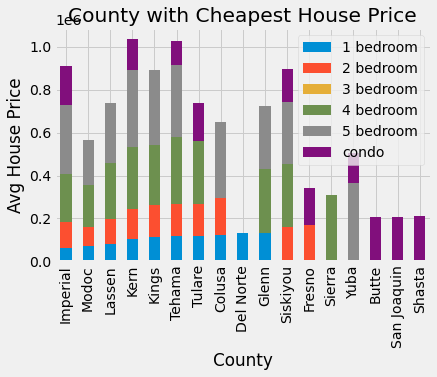

In [60]:
cheapest_1bd = cheapest_place_ca.loc[cheapest_place_ca['Home Type'] == '1 bedroom', ['County', 'Avg house price']]
cheapest_2bd = cheapest_place_ca.loc[cheapest_place_ca['Home Type'] == '2 bedroom', ['County', 'Avg house price']]
cheapest_3bd = cheapest_place_ca.loc[cheapest_place_ca['Home Type'] == '3 bedroom', ['County', 'Avg house price']]
cheapest_4bd = cheapest_place_ca.loc[cheapest_place_ca['Home Type'] == '4 bedroom', ['County', 'Avg house price']]
cheapest_5bd = cheapest_place_ca.loc[cheapest_place_ca['Home Type'] == '5 bedroom', ['County', 'Avg house price']]
cheapest_condo = cheapest_place_ca.loc[cheapest_place_ca['Home Type'] == 'condo', ['County', 'Avg house price']]

cheap_plot = cheapest_1bd.merge(cheapest_2bd, on='County', how='outer', suffixes=('_1bd', '_2bd'))
cheap_plot = cheap_plot.merge(cheapest_3bd, on='County', how='outer')

cheap_plot = cheap_plot.merge(cheapest_4bd, on='County', how='outer', suffixes=('_3bd', '_4bd'))
cheap_plot = cheap_plot.merge(cheapest_5bd, on='County', how='outer')
cheap_plot = cheap_plot.merge(cheapest_condo, on='County', how='outer', suffixes=('_5bd', '_condo'))

cheap_plot = cheap_plot.set_index('County')
cheap_plot = cheap_plot.rename(columns={'Avg house price_1bd': '1 bedroom', 'Avg house price_2bd': '2 bedroom'
                                        , 'Avg house price_3bd': '3 bedroom', 'Avg house price_4bd': '4 bedroom'
                                         , 'Avg house price_5bd': '5 bedroom' , 'Avg house price_condo': 'condo'})

cheap_plot.plot(kind='bar', stacked=True)

plt.title("County with Cheapest House Price")
plt.ylabel("Avg House Price")

plt.show()



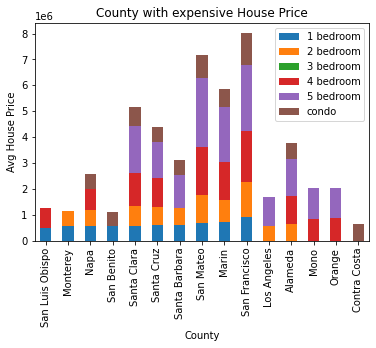

In [21]:
# Most expensive paces in CA
expensive_1bd = expensive_place_ca.loc[expensive_place_ca['Home Type'] == '1 bedroom', ['County', 'Avg house price']]
expensive_2bd = expensive_place_ca.loc[expensive_place_ca['Home Type'] == '2 bedroom', ['County', 'Avg house price']]
expensive_3bd = expensive_place_ca.loc[expensive_place_ca['Home Type'] == '3 bedroom', ['County', 'Avg house price']]
expensive_4bd = expensive_place_ca.loc[expensive_place_ca['Home Type'] == '4 bedroom', ['County', 'Avg house price']]
expensive_5bd = expensive_place_ca.loc[expensive_place_ca['Home Type'] == '5 bedroom', ['County', 'Avg house price']]
expensive_condo = expensive_place_ca.loc[expensive_place_ca['Home Type'] == 'condo', ['County', 'Avg house price']]

expensive_plot = expensive_1bd.merge(expensive_2bd, on='County', how='outer', suffixes=('_1bd', '_2bd'))
expensive_plot = expensive_plot.merge(expensive_3bd, on='County', how='outer')

expensive_plot = expensive_plot.merge(expensive_4bd, on='County', how='outer', suffixes=('_3bd', '_4bd'))
expensive_plot = expensive_plot.merge(expensive_5bd, on='County', how='outer')
expensive_plot = expensive_plot.merge(expensive_condo, on='County', how='outer', suffixes=('_5bd', '_condo'))

expensive_plot = expensive_plot.set_index('County')
expensive_plot = expensive_plot.rename(columns={'Avg house price_1bd': '1 bedroom', 'Avg house price_2bd': '2 bedroom'
                                        , 'Avg house price_3bd': '3 bedroom', 'Avg house price_4bd': '4 bedroom'
                                         , 'Avg house price_5bd': '5 bedroom' , 'Avg house price_condo': 'condo'})

expensive_plot.plot(kind='bar', stacked=True)

plt.title("County with expensive House Price")
plt.ylabel("Avg House Price")

plt.show()

In [33]:
max_house_value = homes_value_orig_df['Avg house price'].max()
min_house_value = homes_value_orig_df['Avg house price'].min()

max_house_value

2664478.83

### House for any budget

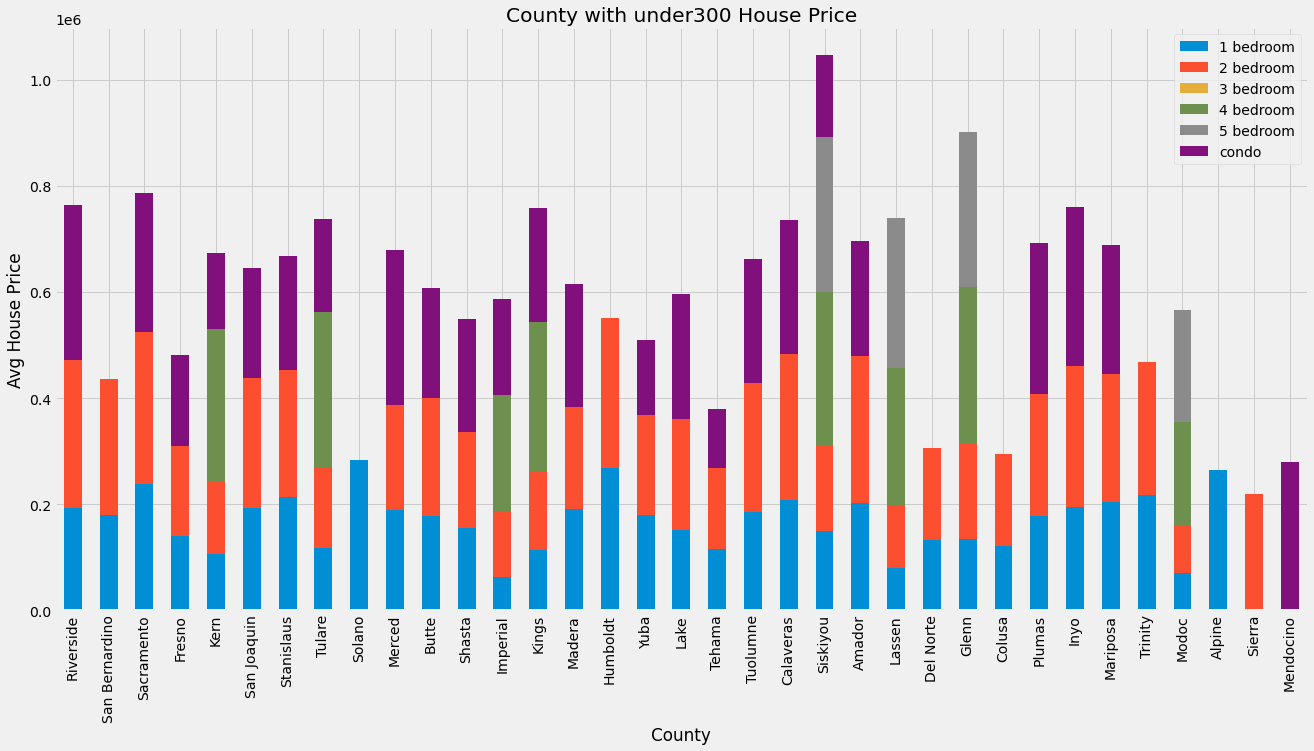

In [52]:
# Under 300 000
#under_300 = homes_value_orig_df[homes_value_orig_df['Avg house price'] < 300000 & ]


under300_1bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '1 bedroom') & (homes_value_orig_df['Avg house price'] < 300000), ['County', 'Avg house price']]
under300_2bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '2 bedroom') & (homes_value_orig_df['Avg house price'] < 300000), ['County', 'Avg house price']]
under300_3bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '3 bedroom') & (homes_value_orig_df['Avg house price'] < 300000), ['County', 'Avg house price']]
under300_4bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '4 bedroom') & (homes_value_orig_df['Avg house price'] < 300000), ['County', 'Avg house price']]
under300_5bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '5 bedroom') & (homes_value_orig_df['Avg house price'] < 300000), ['County', 'Avg house price']]
under300_condo = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == 'condo') & (homes_value_orig_df['Avg house price'] < 300000), ['County', 'Avg house price']]

under300_plot = under300_1bd.merge(under300_2bd, on='County', how='outer', suffixes=('_1bd', '_2bd'))
under300_plot = under300_plot.merge(under300_3bd, on='County', how='outer')

under300_plot = under300_plot.merge(under300_4bd, on='County', how='outer', suffixes=('_3bd', '_4bd'))
under300_plot = under300_plot.merge(under300_5bd, on='County', how='outer')
under300_plot = under300_plot.merge(under300_condo, on='County', how='outer', suffixes=('_5bd', '_condo'))

under300_plot = under300_plot.set_index('County')
under300_plot = under300_plot.rename(columns={'Avg house price_1bd': '1 bedroom', 'Avg house price_2bd': '2 bedroom'
                                        , 'Avg house price_3bd': '3 bedroom', 'Avg house price_4bd': '4 bedroom'
                                         , 'Avg house price_5bd': '5 bedroom' , 'Avg house price_condo': 'condo'})
matplotlib.style.use('fivethirtyeight')
under300_plot.plot(kind='bar', figsize=(20,10), stacked=True)

plt.title("County with under300 House Price")
plt.ylabel("Avg House Price")

plt.show()



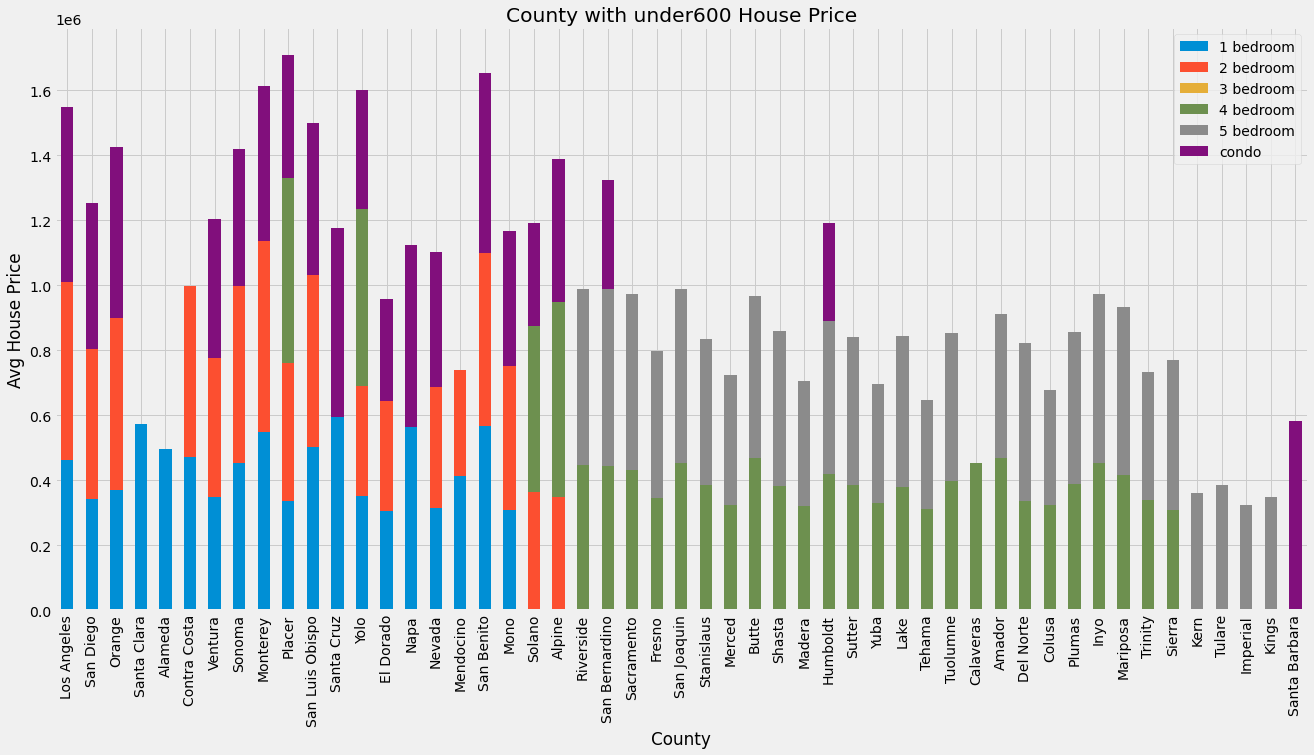

In [54]:
# between 300,000 and 600,000
under600_1bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '1 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 300000) 
                                       & (homes_value_orig_df['Avg house price'] < 600000)
                                       , ['County', 'Avg house price']]

under600_2bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '2 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 300000) 
                                       & (homes_value_orig_df['Avg house price'] < 600000)
                                       , ['County', 'Avg house price']]

under600_3bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '3 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 300000) 
                                       & (homes_value_orig_df['Avg house price'] < 600000)
                                       , ['County', 'Avg house price']]

under600_4bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '4 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 300000) 
                                       & (homes_value_orig_df['Avg house price'] < 600000)
                                       , ['County', 'Avg house price']]

under600_5bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '5 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 300000) 
                                       & (homes_value_orig_df['Avg house price'] < 600000)
                                       , ['County', 'Avg house price']]

under600_condo = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == 'condo') 
                                         & (homes_value_orig_df['Avg house price'] > 300000) 
                                         & (homes_value_orig_df['Avg house price'] < 600000)
                                         , ['County', 'Avg house price']]

under600_plot = under600_1bd.merge(under600_2bd, on='County', how='outer', suffixes=('_1bd', '_2bd'))
under600_plot = under600_plot.merge(under600_3bd, on='County', how='outer')

under600_plot = under600_plot.merge(under600_4bd, on='County', how='outer', suffixes=('_3bd', '_4bd'))
under600_plot = under600_plot.merge(under600_5bd, on='County', how='outer')
under600_plot = under600_plot.merge(under600_condo, on='County', how='outer', suffixes=('_5bd', '_condo'))

under600_plot = under600_plot.set_index('County')
under600_plot = under600_plot.rename(columns={'Avg house price_1bd': '1 bedroom', 'Avg house price_2bd': '2 bedroom'
                                        , 'Avg house price_3bd': '3 bedroom', 'Avg house price_4bd': '4 bedroom'
                                         , 'Avg house price_5bd': '5 bedroom' , 'Avg house price_condo': 'condo'})
matplotlib.style.use('fivethirtyeight')
under600_plot.plot(kind='bar', figsize=(20,10), stacked=True)

plt.title("County with under600 House Price")
plt.ylabel("Avg House Price")

plt.show()

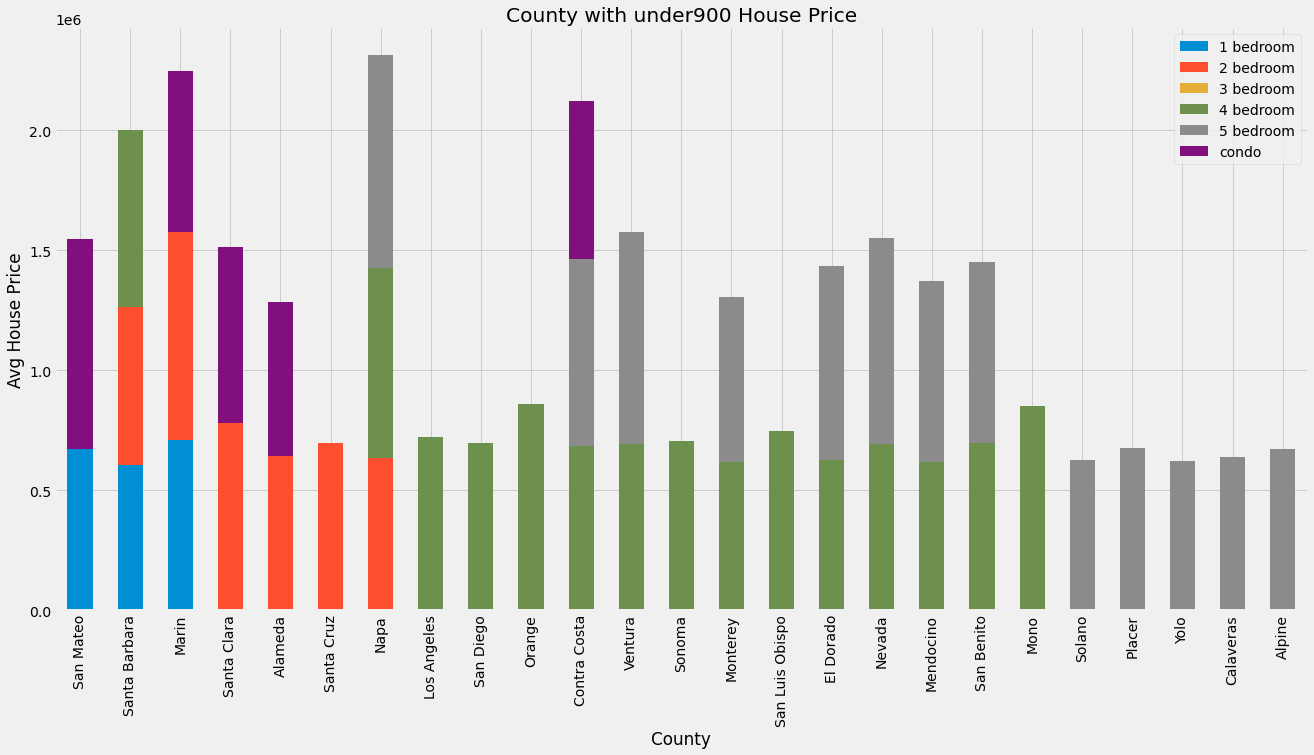

In [55]:
# between 600,000 and 900,000
under900_1bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '1 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 600000) 
                                       & (homes_value_orig_df['Avg house price'] < 900000)
                                       , ['County', 'Avg house price']]

under900_2bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '2 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 600000) 
                                       & (homes_value_orig_df['Avg house price'] < 900000)
                                       , ['County', 'Avg house price']]

under900_3bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '3 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 600000) 
                                       & (homes_value_orig_df['Avg house price'] < 900000)
                                       , ['County', 'Avg house price']]

under900_4bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '4 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 600000) 
                                       & (homes_value_orig_df['Avg house price'] < 900000)
                                       , ['County', 'Avg house price']]

under900_5bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '5 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 600000) 
                                       & (homes_value_orig_df['Avg house price'] < 900000)
                                       , ['County', 'Avg house price']]

under900_condo = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == 'condo') 
                                         & (homes_value_orig_df['Avg house price'] > 600000) 
                                         & (homes_value_orig_df['Avg house price'] < 900000)
                                         , ['County', 'Avg house price']]

under900_plot = under900_1bd.merge(under900_2bd, on='County', how='outer', suffixes=('_1bd', '_2bd'))
under900_plot = under900_plot.merge(under900_3bd, on='County', how='outer')

under900_plot = under900_plot.merge(under900_4bd, on='County', how='outer', suffixes=('_3bd', '_4bd'))
under900_plot = under900_plot.merge(under900_5bd, on='County', how='outer')
under900_plot = under900_plot.merge(under900_condo, on='County', how='outer', suffixes=('_5bd', '_condo'))

under900_plot = under900_plot.set_index('County')
under900_plot = under900_plot.rename(columns={'Avg house price_1bd': '1 bedroom', 'Avg house price_2bd': '2 bedroom'
                                        , 'Avg house price_3bd': '3 bedroom', 'Avg house price_4bd': '4 bedroom'
                                         , 'Avg house price_5bd': '5 bedroom' , 'Avg house price_condo': 'condo'})
matplotlib.style.use('fivethirtyeight')
under900_plot.plot(kind='bar', figsize=(20,10), stacked=True)

plt.title("County with under900 House Price")
plt.ylabel("Avg House Price")

plt.show()

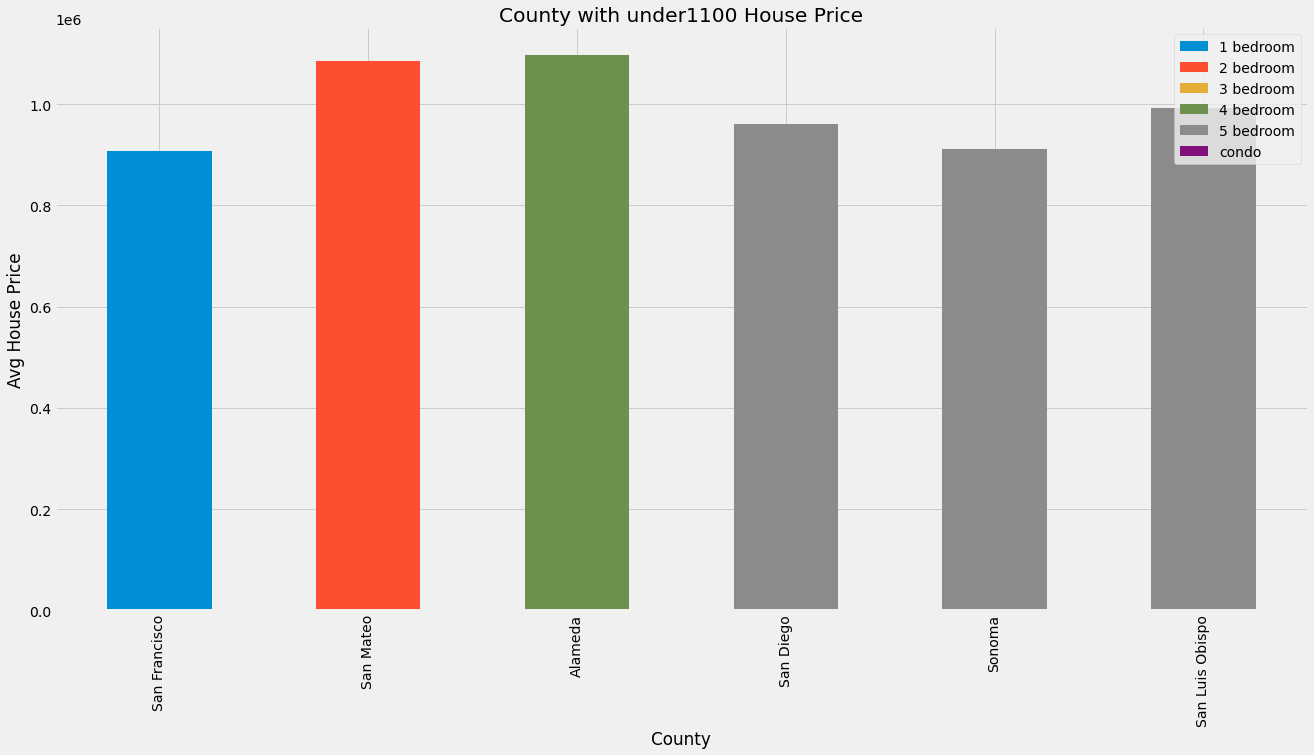

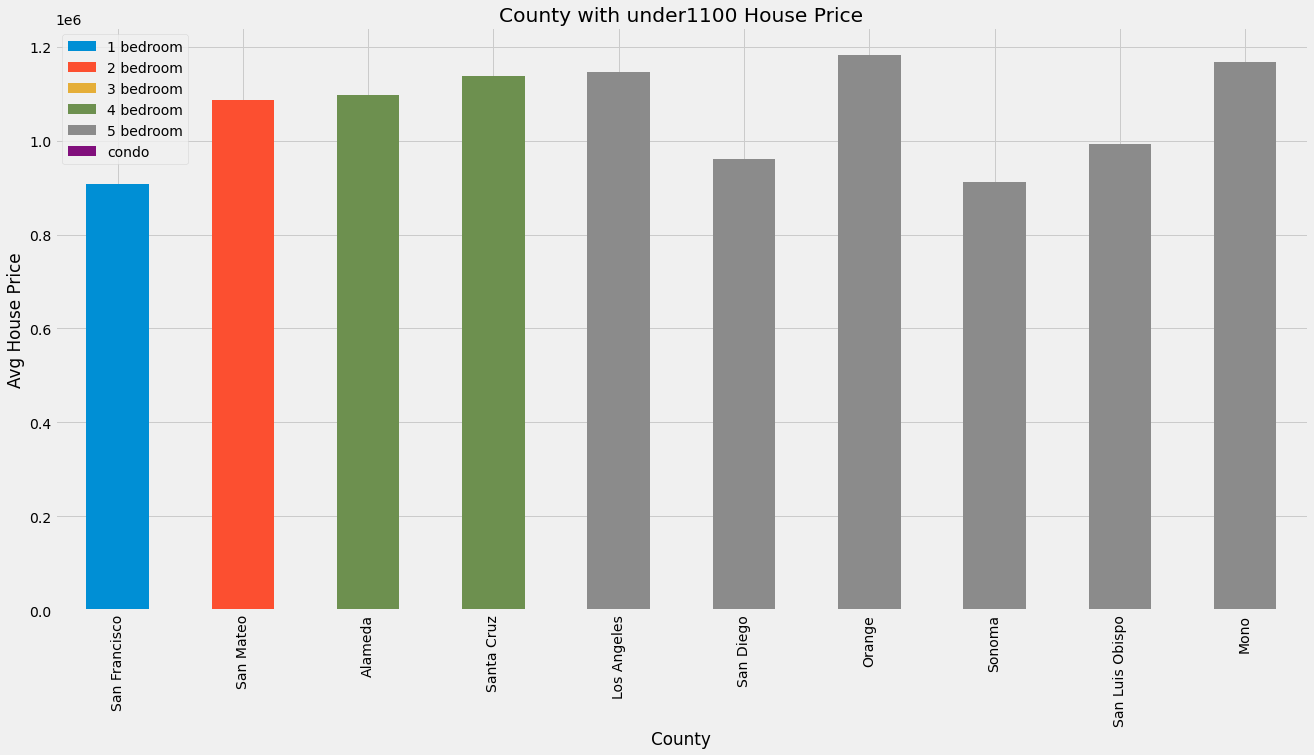

In [57]:
# between 900,000 and 1 200,000
under1100_1bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '1 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 900000) 
                                       & (homes_value_orig_df['Avg house price'] < 1200000)
                                       , ['County', 'Avg house price']]

under1100_2bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '2 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 900000) 
                                       & (homes_value_orig_df['Avg house price'] < 1200000)
                                       , ['County', 'Avg house price']]

under1100_3bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '3 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 900000) 
                                       & (homes_value_orig_df['Avg house price'] < 1200000)
                                       , ['County', 'Avg house price']]

under1100_4bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '4 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 900000) 
                                       & (homes_value_orig_df['Avg house price'] < 1200000)
                                       , ['County', 'Avg house price']]

under1100_5bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '5 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 900000) 
                                       & (homes_value_orig_df['Avg house price'] < 1200000)
                                       , ['County', 'Avg house price']]

under1100_condo = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == 'condo') 
                                         & (homes_value_orig_df['Avg house price'] > 900000) 
                                         & (homes_value_orig_df['Avg house price'] < 1200000)
                                         , ['County', 'Avg house price']]

under1100_plot = under1100_1bd.merge(under1100_2bd, on='County', how='outer', suffixes=('_1bd', '_2bd'))
under1100_plot = under1100_plot.merge(under1100_3bd, on='County', how='outer')

under1100_plot = under1100_plot.merge(under1100_4bd, on='County', how='outer', suffixes=('_3bd', '_4bd'))
under1100_plot = under1100_plot.merge(under1100_5bd, on='County', how='outer')
under1100_plot = under1100_plot.merge(under1100_condo, on='County', how='outer', suffixes=('_5bd', '_condo'))

under1100_plot = under1100_plot.set_index('County')
under1100_plot = under1100_plot.rename(columns={'Avg house price_1bd': '1 bedroom', 'Avg house price_2bd': '2 bedroom'
                                        , 'Avg house price_3bd': '3 bedroom', 'Avg house price_4bd': '4 bedroom'
                                         , 'Avg house price_5bd': '5 bedroom' , 'Avg house price_condo': 'condo'})
matplotlib.style.use('fivethirtyeight')
under1100_plot.plot(kind='bar', figsize=(20,10), stacked=True)

plt.title("County with under1100 House Price")
plt.ylabel("Avg House Price")

plt.show()

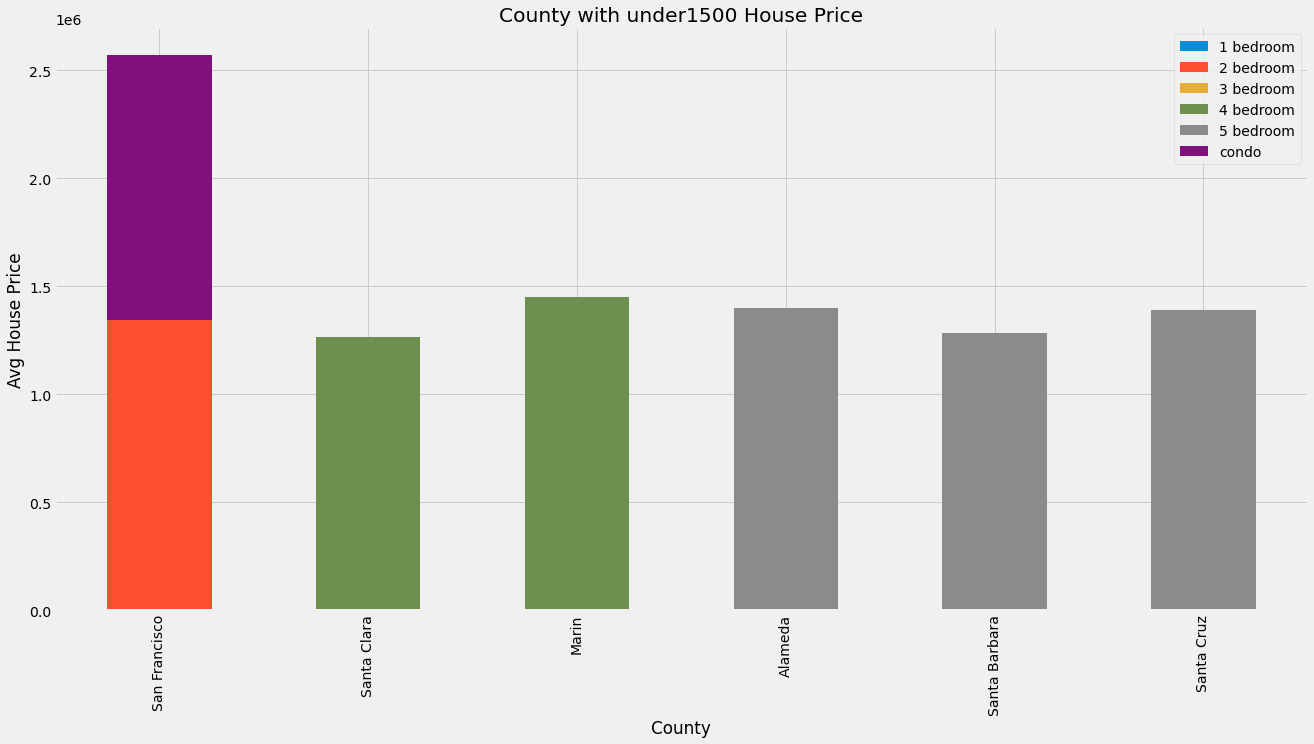

In [58]:
# between 1 200,000 and 1 500,000
under1500_1bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '1 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 1200000) 
                                       & (homes_value_orig_df['Avg house price'] < 1500000)
                                       , ['County', 'Avg house price']]

under1500_2bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '2 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 1200000) 
                                       & (homes_value_orig_df['Avg house price'] < 1500000)
                                       , ['County', 'Avg house price']]

under1500_3bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '3 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 1200000) 
                                       & (homes_value_orig_df['Avg house price'] < 1500000)
                                       , ['County', 'Avg house price']]

under1500_4bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '4 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 1200000) 
                                       & (homes_value_orig_df['Avg house price'] < 1500000)
                                       , ['County', 'Avg house price']]

under1500_5bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '5 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 1200000) 
                                       & (homes_value_orig_df['Avg house price'] < 1500000)
                                       , ['County', 'Avg house price']]

under1500_condo = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == 'condo') 
                                         & (homes_value_orig_df['Avg house price'] > 1200000) 
                                         & (homes_value_orig_df['Avg house price'] < 1500000)
                                         , ['County', 'Avg house price']]

under1500_plot = under1500_1bd.merge(under1500_2bd, on='County', how='outer', suffixes=('_1bd', '_2bd'))
under1500_plot = under1500_plot.merge(under1500_3bd, on='County', how='outer')

under1500_plot = under1500_plot.merge(under1500_4bd, on='County', how='outer', suffixes=('_3bd', '_4bd'))
under1500_plot = under1500_plot.merge(under1500_5bd, on='County', how='outer')
under1500_plot = under1500_plot.merge(under1500_condo, on='County', how='outer', suffixes=('_5bd', '_condo'))

under1500_plot = under1500_plot.set_index('County')
under1500_plot = under1500_plot.rename(columns={'Avg house price_1bd': '1 bedroom', 'Avg house price_2bd': '2 bedroom'
                                        , 'Avg house price_3bd': '3 bedroom', 'Avg house price_4bd': '4 bedroom'
                                         , 'Avg house price_5bd': '5 bedroom' , 'Avg house price_condo': 'condo'})
matplotlib.style.use('fivethirtyeight')
under1500_plot.plot(kind='bar', figsize=(20,10), stacked=True)

plt.title("County with under1500 House Price")
plt.ylabel("Avg House Price")

plt.show()